# Week 11 Scratch Paper and Notes

In [76]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import set_config
set_config(display='diagram')

In [51]:
## Data Filepaths
nba_filepath = 'https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/nba.csv'

# Neural Networks
Trying to find the ideal value for weights and biases that result in the lowest ammount of loss.

A complete passing of your data forward and backwards is called an epoch. The more epochs the better the model will do at learning the weights/biases that reduce loss.

## Forward Pass
1. Take your inputs and multiply each by a weight
2. add the results from step 1 together
3. add a value (called bias) to the results from step 2
4. Pass the results from step 3 through an activation function
5. the result from step 4 is then passed to the next layer where this is repeated.. 


## Vocab
- Node: One unit that process incoming infomration and produces a single output number
- Layer: A colection of nodes working in parallel.
- Input Layer: the first set of nodes that work on the features of the imput sample.
- Output Layer: the last set of nodes that output a prediction
- Forward Propogation: the process and passing of information forward through all layers to produce an output prediction
- Cost Function: The difference between the predictions of all samples and their true labels
- Backwards Propogation: the process of updating the weights of each node to reduce the cost function

## Overview
- Sequential Neural Network Models work forward and backwards through through a lattice of nodes organized into layers. Each iteration is called an epoch.
- There must be a minimum of two layers. The first is the input layer, the last is the output layer. Between these there can be any number of 'hidden' layers. The input layer must have as many nodes as the original inputs from the dataset. The output must have as many nodes as the desired output. The hidden layers can have any number of nodes between these.
- During the forward pass (forward Propogation) each node in the layer is multiplied by a unique weight and added a unique bias before bineg fit to an activation function. This process is repeated across the layers until reaching the output layer. 
-The activation function provides the value for the next node after being fit. The activation function can take the form of a linear, sigmoid, hyperbolic tangent (tanh), or rectified linear unit (ReLu).
- The output layer is compared to the known results in the training model and then adjusted through back propogation based on the cost/loss function. Uses gradient descent and partial derivatives to automate this...

A note on Activation functions. Every layer can apply different activation functions to fit the model... EXCEPT the output node which must match the desired output
- Regression must use the linear function
- Binary classification must use sigmoid
- multi-class classification must use softmax

### Python Example - Keras Neural Network
Keras is an API that acts as an interface for Tensorflow

Pythorch is another popular API for Tensorflow which is not covered

In [52]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [53]:
df = pd.read_csv(nba_filepath, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [54]:
# drop mising values
df.dropna(inplace = True)

# create feature matrix and target
X = df.drop(columns = 'TARGET_5Yrs')
y = df['TARGET_5Yrs']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [55]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Step 1: define structure
print(f' X_train shape: {X_train.shape}')

# create a shape for our input layer. Use shape to make repeatable
input_shape = X_train.shape[1]
input_shape

 X_train shape: (996, 19)


19

In [57]:
# Instantiate Sequential Model
model = Sequential()

In [58]:
# First hidden layer
model.add(Dense(19, # how many neurons in the first hidden layer
          input_dim = input_shape, # shape of the input features (only needed on first hidden layer)
          activation = 'relu')) # activation function. Pick your poison.. relu is popular

# second hidden layer
model.add(Dense(10, # number of neurons
          activation = 'relu')) # activation function

In [59]:
# Output layer
model.add(Dense(1, # classification so only one output (0 or 1)
                activation = 'sigmoid')) # classification problem so NEED sigmoid for output layer

When compiling we need to pick an optimizer (adam tends to work well) and define/specify the loss function
- regression loss function: MSE
- binary classification loss function: binary cross entropy (bce)
- multiclass classification loss function: categorical cross entropy (cce)

In [60]:
# Step 2 Compile
model.compile(loss = 'bce', optimizer = 'adam')

In [61]:
# Step 3. fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 20)

Epoch 1/20
32/32 [==============================] - 1s 11ms/step - loss: 0.7273 - val_loss: 0.6776
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6457 - val_loss: 0.6259
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6180 - val_loss: 0.6022
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6004 - val_loss: 0.5919
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 0.5897 - val_loss: 0.5844
Epoch 6/20
32/32 [==============================] - 0s 15ms/step - loss: 0.5819 - val_loss: 0.5811
Epoch 7/20
32/32 [==============================] - 0s 12ms/step - loss: 0.5759 - val_loss: 0.5818
Epoch 8/20
32/32 [==============================] - 0s 11ms/step - loss: 0.5713 - val_loss: 0.5820
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5678 - val_loss: 0.5810
Epoch 10/20
32/32 [==============================] - 0s 7ms/step - loss: 0.5649 - val_loss: 0.5776
Epoch 11/20
32/

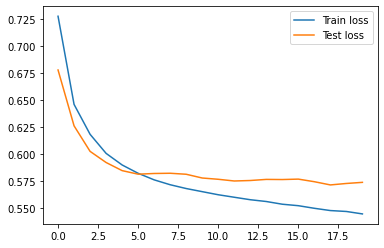

In [62]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();

## Model Complexity
- Underfit Model: Not Copmlex Enough.. acuracy of the model is not improving
    - Solution: Add more layers (usually better)
    - Slution: Add more neurons (sometimes better)
    - Remember adding complexity reduces bias but posibly more variance
-Ovrefit Model: Too complex. Accuracy of training model increases but the testing data does not.
    - Solution: Make it smaller / Decrease complexity.
    - Solution: add dropout layers
- Training and Overtraining: Training for too many/few epochs. Model falls off or gets jittery over time.
    - Solution: include early stopping callbacks

## Dropout
Dropout is a regularization technique used to combat overfitting.

Other methods of regularization include: Early Stopping and L1/L2 regularization.

Dropout drops out a portion of the neurons so that the model does not learn weights and biases that are too perfect for the training set. The proportion/probability of a neuron being dropped is created during the modeling.

### Python Example - Dropout

In [63]:
# from tensorflow.keras.layers import Dropout

In [66]:
# We will use the NBA dataset used for the Neural Network example above.
# Data has already been loaded, cleaned, split, and scaled for ML. 
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [67]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [69]:
# Overfit model without dropout
model = Sequential()

# First Hidden Layer
model.add(Dense(19, # Number of Neurons
          input_dim = input_shape, # shape of input
          activation = 'relu')) # activation function

          
# Second Hidden Layer
model.add(Dense(10, # Number of Neurons
          activation = 'relu')) # activation function

# Output Layer
model.add(Dense(1,
                activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6382 - val_loss: 0.5980
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6035 - val_loss: 0.5825
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5895 - val_loss: 0.5787
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5794 - val_loss: 0.5833
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5726 - val_loss: 0.5787
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5662 - val_loss: 0.5801
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5612 - val_loss: 0.5772
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5567 - val_loss: 0.5772
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5537 - val_loss: 0.5737
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5523 - val_loss: 0.5739
Epoch 11

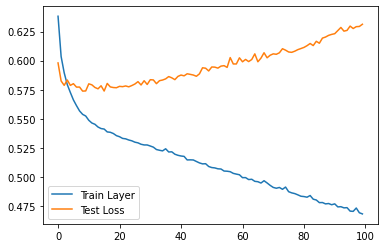

In [70]:
plt.plot(history.history['loss'], label = 'Train Layer')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

Model is super overfit. Training model continues to improve while the testing model goes the wrong direction as the epochs continue.

In [73]:
# Now with dropout to eliminate overfitting
model = Sequential()

# First Hidden Layer
model.add(Dense(19,
          input_dim = input_shape,
          activation = 'relu'))
model.add(Dropout(.2)) #.2 is the probability of a neuron getting dropped. In this case 20%

# Second Hidden Layer
model.add(Dense(10,
          activation = 'relu')) 
model.add(Dropout(.2)) 

# Output Layer
model.add(Dense(1,
                activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam')

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6960 - val_loss: 0.6163
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6454 - val_loss: 0.5935
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6269 - val_loss: 0.5836
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6342 - val_loss: 0.5797
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.5763
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6302 - val_loss: 0.5738
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6119 - val_loss: 0.5737
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5977 - val_loss: 0.5732
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6042 - val_loss: 0.5732
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5876 - val_loss: 0.5695
Epoch 11/

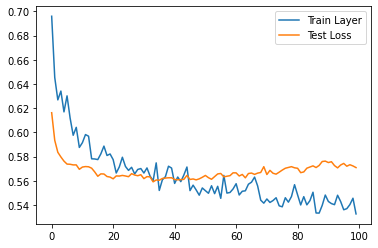

In [74]:
plt.plot(history.history['loss'], label = 'Train Layer')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

## Early Stopping
Early stopping terminates the training model after the validation loss begins to increase. This ensures the model doesnt keep running/overfitting after its reached is best position.


### Python Example - Early Stopping

In [88]:
# from tensorflow.keras.callbacks import EarlyStopping

In [77]:
# We will use the NBA dataset used for the Neural Network example above.
# Data has already been loaded, cleaned, split, and scaled for ML. 
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [78]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [80]:
# Same Base Model... Overfit model without Early Stopping
model = Sequential()

# First Hidden Layer
model.add(Dense(19, # Number of Neurons
          input_dim = input_shape, # shape of input
          activation = 'relu')) # activation function

          
# Second Hidden Layer
model.add(Dense(10, # Number of Neurons
          activation = 'relu')) # activation function

# Output Layer
model.add(Dense(1,
                activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6448 - val_loss: 0.6106
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 0.5929
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5873 - val_loss: 0.5883
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5813 - val_loss: 0.5856
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5754 - val_loss: 0.5818
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5709 - val_loss: 0.5797
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5674 - val_loss: 0.5753
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5623 - val_loss: 0.5761
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5603 - val_loss: 0.5746
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5580 - val_loss: 0.5736
Epoch 11/

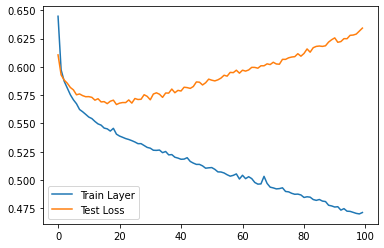

In [81]:
# visualize the loss
plt.plot(history.history['loss'], label = 'Train Layer')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

As we commented before the model is overfit. Lets try fixing it or at least stopping it early this time....

In [89]:
# Now with Early Stopping
model = Sequential()

# First Hidden Layer
model.add(Dense(19,
          input_dim = input_shape,
          activation = 'relu'))

# Second Hidden Layer
model.add(Dense(10,
          activation = 'relu')) 

# Output Layer
model.add(Dense(1,
                activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam')

# Early Stopping adjusting patience.
#Patience is the number of epochs where the val_loss increases before stopping 
early_stopping = EarlyStopping(patience = 5)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6793 - val_loss: 0.6034
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6053 - val_loss: 0.5850
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5891 - val_loss: 0.5798
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5823 - val_loss: 0.5776
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5785 - val_loss: 0.5764
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5741 - val_loss: 0.5754
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5709 - val_loss: 0.5723
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5678 - val_loss: 0.5714
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5655 - val_loss: 0.5729
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5643 - val_loss: 0.5701
Epoch 11/

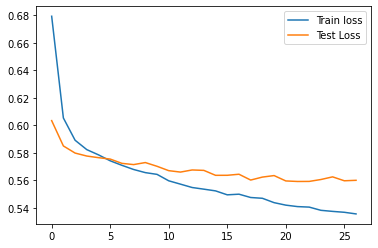

In [90]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();